In [1]:
# Ignore this block -- it's for the documentation build
try:
    import os, sys
    sys.path.insert(1, os.path.abspath('/home/runner/work/psi4/psi4/code/objdir/stage//usr/local/psi4/lib/'))
except ImportError:
    pass

# This is the important part
import psi4

In [2]:
psi4.core.set_output_file('output1.dat', False)

In [11]:
#! Sample HF/cc-pVDZ Ar2 Computation

psi4.set_memory('500 MB')

ar2 = psi4.geometry("""
Ar
Ar 1 0.96
""")

psi4.energy('scf/cc-pvdz')

-1048.387923707043

In [15]:
#! Sample UHF/6-31G** CH2 Computation

R = 1.075
A = 133.93

ar2 = psi4.geometry("""
0 2
Ar
Ar 1 {0}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')



c: [0]
fc: [0.0]
m: [2]
fm: [2]


ValidationError: Inconsistent or unspecified chg/mult: sys chg: None, frag chg: [0.0], sys mult: None, frag mult: [2]

In [5]:
psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)

Optimizer: Optimization complete!


-76.02703272937481

In [6]:
scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)

In [7]:
# Example SAPT computation for ethene*ethyne (*i.e.*, ethylene*acetylene).
# Test case 16 from S22 Database

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")

In [8]:
psi4.set_options({'scf_type': 'df',
                  'freeze_core': 'true'})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)

-0.0022355823909805178

In [39]:
#! Example potential energy surface scan and CP-correction for Ae2
ls_e=[]
ar2_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = np.arange(3.5,6.1,0.1)

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ar2 = psi4.geometry(ar2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))
    ls_e.append(e)
# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

psi4.core.set_output_file('output1.dat', False)

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            3.5                        0.169820
            3.6                        0.037518
            3.7                        -0.042931
            3.8                        -0.089134
            3.9                        -0.113090
            4.0                        -0.122889
            4.1                        -0.123921
            4.2                        -0.119738
            4.3                        -0.112652
            4.4                        -0.104146
            4.5                        -0.095152
            4.6                        -0.086236
            4.7                        -0.077730
            4.8                        -0.069808
            4.9                        -0.062548
            5.0                        -0.055968
            5.1                        -0.0500

In [40]:
import numpy as np  
import matplotlib.pyplot as plt  
import scipy
from scipy.optimize import curve_fit

In [41]:
y = np.array(ls_e)
x = Rvals

In [42]:
def lj(r,sigma,eps):
    return 4*eps*( (sigma/r)**12-(sigma/r)**6)

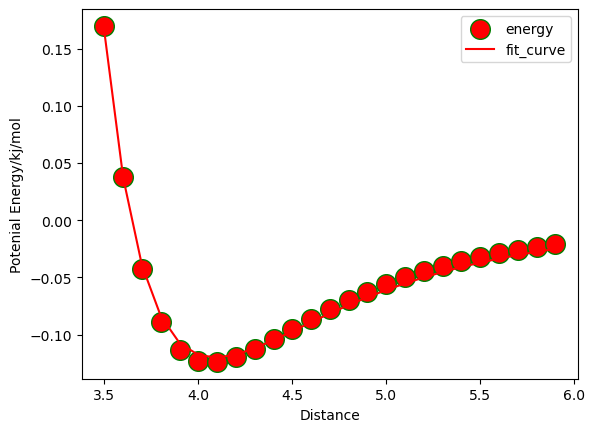

<Figure size 640x480 with 0 Axes>

In [44]:
plt.scatter(x, y, color='r', marker='o', edgecolors='g', s=200,label='energy')
popt, pcov = curve_fit(lj, x, y)
y1 = [lj(i, popt[0], popt[1]) for i in x]
plt.plot(x, y1, 'r',label='fit_curve')
plt.xlabel('Distance')#设置x轴名字
plt.ylabel('Potenial Energy/kj/mol')#设置y轴名字
plt.legend(loc=0)
plt.show()
plt.savefig('./fit_curve.jpg')

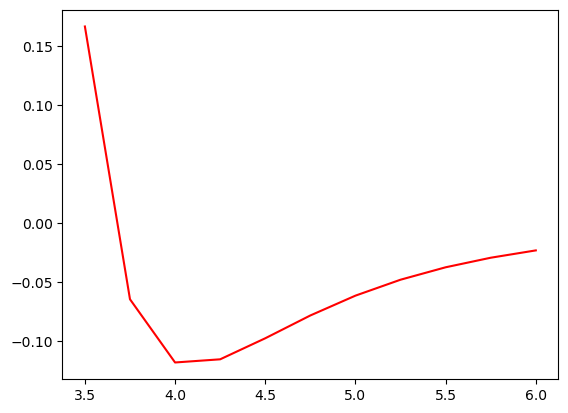